

You are given a CIFAR10 dataset from torch. You tasks are:
- Create an Artificial Neural Network (ANN) model that can classify the images to specific class.
- Clearly define the architecture of your ANN model, specifying the number of layers, neurons, and activation functions.
- Make two version of your model with different number of layers and hidden neurons
- Train the model on the prepared data and evaluate its performance on a separate validation set.
- Track the training loss during training and plot it to visualize the learning process.

- Plot some samples predictions from the trained model.

In [15]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

In [16]:
## Dataset:
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [17]:
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [18]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 50)
        self.fc3 = nn.Linear(50, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)  # Flatten input tensor except batch dimension
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

In [19]:
import matplotlib.pyplot as plt

def train_and_plot_loss(model, criterion, optimizer, num_epochs):
    train_losses = []

    # Assuming you have a GPU available, move your model to the GPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)  # Move the model to the device

    for epoch in range(num_epochs):
        running_loss = 0.0

        for i, (inputs, labels) in enumerate(trainloader):
            inputs = inputs.to(device)  # Move inputs to device
            labels = labels.to(device)  # Move labels to device

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        epoch_loss = running_loss / len(trainloader)
        train_losses.append(epoch_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}")

    # Plot the training loss
    plt.plot(range(1, len(train_losses) + 1), train_losses)
    plt.xlabel('Epoch')
    plt.ylabel('Training Loss')
    plt.title('Training Loss')
    plt.show()

In [20]:
import torch.optim as optim
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

learning_rate = 0.001
num_epochs = 5

model = ANN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Epoch [1/5], Train Loss: 1.8733
Epoch [2/5], Train Loss: 1.6908
Epoch [3/5], Train Loss: 1.6140
Epoch [4/5], Train Loss: 1.5601
Epoch [5/5], Train Loss: 1.5179


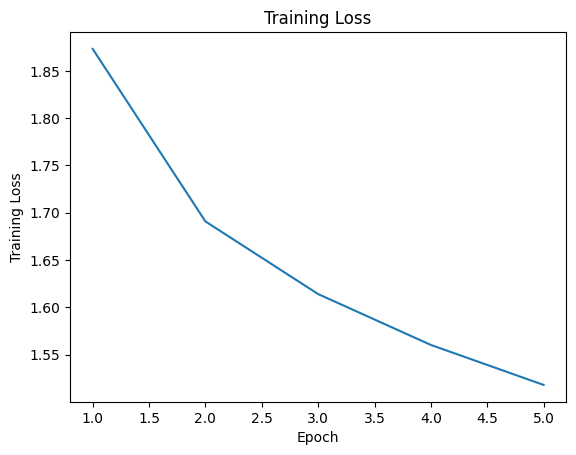

In [21]:
train_and_plot_loss(model, criterion, optimizer, num_epochs)

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(model):
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in testloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f"Accuracy on Test Set: {accuracy:.2f}%")



evaluate_model(model)

Accuracy on Test Set: 45.57%


# another version

In [23]:
class ANN2(nn.Module):
    def __init__(self):
        super(ANN2, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 265)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(265, 128)
        self.fc3 = nn.Linear(128, 32)
        self.fc4 = nn.Linear(32, 10)


    def forward(self, x):
        x = torch.flatten(x, 1)  # Flatten input tensor except batch dimension
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.fc4(x)
        return x

In [24]:

learning_rate = 0.001
num_epochs = 5

model = ANN2().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Epoch [1/5], Train Loss: 1.8562
Epoch [2/5], Train Loss: 1.6822
Epoch [3/5], Train Loss: 1.5933
Epoch [4/5], Train Loss: 1.5359
Epoch [5/5], Train Loss: 1.4961


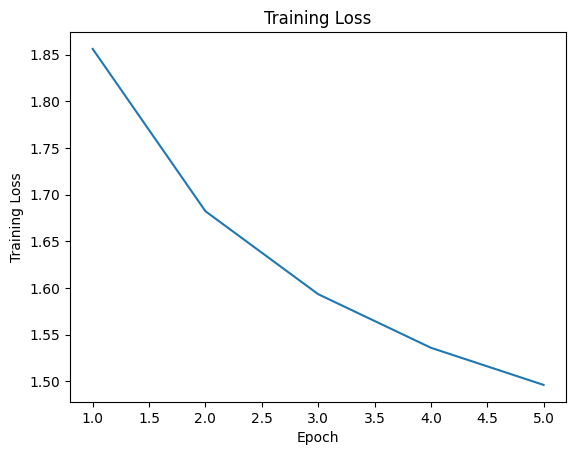

In [25]:
train_and_plot_loss(model, criterion, optimizer, num_epochs)

In [26]:
evaluate_model(model)

Accuracy on Test Set: 46.64%


# CNN MODEL

In [27]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

In [28]:
## Dataset:
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [29]:
train_ratio = 0.8  # 80% for training
val_ratio = 0.1  # 10% for validation
test_ratio = 1 - train_ratio - val_ratio  # Remaining for testing

num_train = len(train_dataset)
train_size = int(train_ratio * num_train)
val_size = int(val_ratio * num_train)
test_size = num_train - train_size - val_size

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size, test_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [50]:
import torch
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # Define the convolutional layers
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)

        # Define the fully connected layers
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # Apply the convolutional layers
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)

        # Reshape the tensor for the fully connected layers
        x = x.view(x.size(0), -1)

        # Apply the fully connected layers
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)

        return x

In [51]:
import torch.optim as optim
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

learning_rate = 0.001
num_epochs = 5

model = CNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Epoch 1: Loss = 1.619045966911316
Epoch 2: Loss = 1.2941685795783997
Epoch 3: Loss = 1.1573856038093566
Epoch 4: Loss = 1.0707731905937194
Epoch 5: Loss = 1.0018019068717956


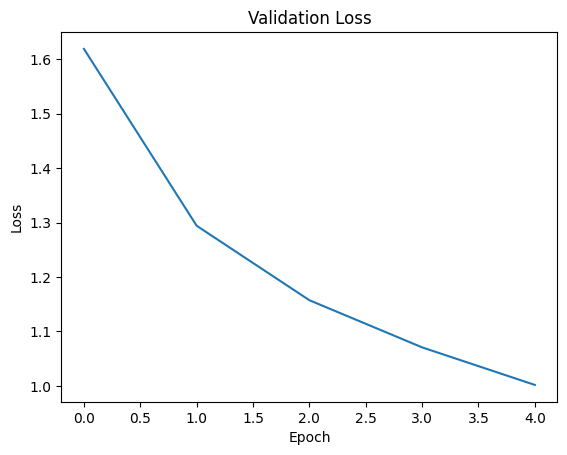

Validation Accuracy: 64.68%


In [52]:
# Training loop
num_epochs = 5
train_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Update the running loss
        running_loss += loss.item()

    # Calculate the average loss for the epoch
    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    # Print the average loss for the epoch
    print(f"Epoch {epoch+1}: Loss = {epoch_loss}")

# Plot the training loss
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.show()

# Evaluation on the validation set
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Validation Accuracy: {accuracy}%")

# another version

In [53]:
import torch
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # Define the convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)

        # Define the fully connected layers
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)

    def forward(self, x):
        # Apply the convolutional layers
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)
        x = nn.functional.relu(self.conv3(x))
        x = nn.functional.max_pool2d(x, 2)

        # Reshape the tensor for the fully connected layers
        x = x.view(x.size(0), -1)

        # Apply the fully connected layers
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.relu(self.fc3(x))
        x = self.fc4(x)

        return x

In [54]:
import torch.optim as optim
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

learning_rate = 0.001
num_epochs = 5

model2 = CNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=learning_rate)

Epoch 1: Loss = 1.6518297397613526
Epoch 2: Loss = 1.238430227947235
Epoch 3: Loss = 1.0231056303977966
Epoch 4: Loss = 0.8614353614330291
Epoch 5: Loss = 0.7310061866283417


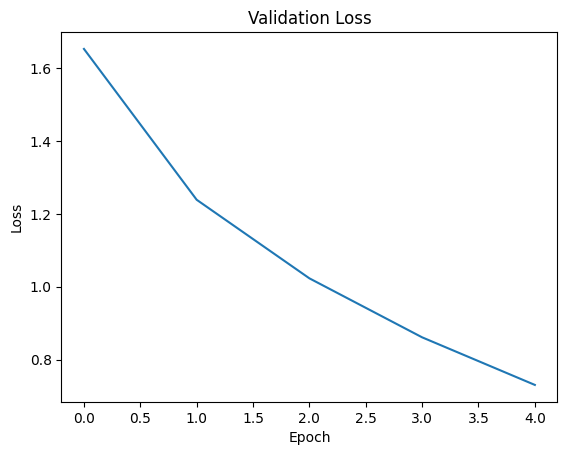

Validation Accuracy: 64.68%


In [55]:
num_epochs = 5
train_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model2(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Update the running loss
        running_loss += loss.item()

    # Calculate the average loss for the epoch
    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    # Print the average loss for the epoch
    print(f"Epoch {epoch+1}: Loss = {epoch_loss}")

# Plot the training loss
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.show()

# Evaluation on the validation set
model2.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Validation Accuracy: {accuracy}%")